# Load MNIST dataset

Keras makes loading the [MNIST](http://yann.lecun.com/exdb/mnist/) database of handwritten digits very easy

In [1]:
from keras.datasets import mnist

# train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


## Dataset

In [2]:
print "The MNIST database contains %d training images and %d test images." % (len(X_train), len(X_test))
print "The images are %dx%d pixels." % (X_train.shape[1], X_train.shape[2])
print "Gray levels: [%d,%d]." % (X_train[0].min(),X_train[0].max())

The MNIST database contains 60000 training images and 10000 test images.
The images are 28x28 pixels.
Gray levels: [0,255].


## Visualization

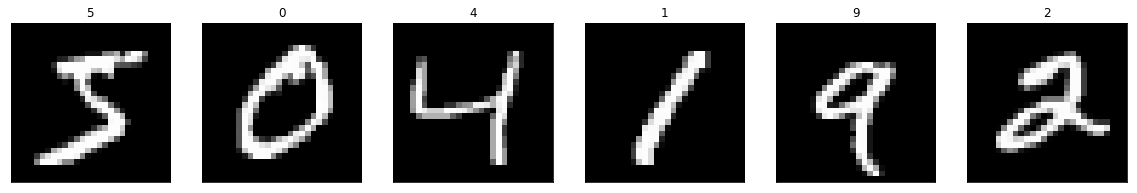

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# plot first six training images
fig = plt.figure(figsize = (20,20) )
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks = [], yticks = [])
    ax.imshow(X_train[i], cmap = 'gray')
    ax.set_title(str(y_train[i]) )

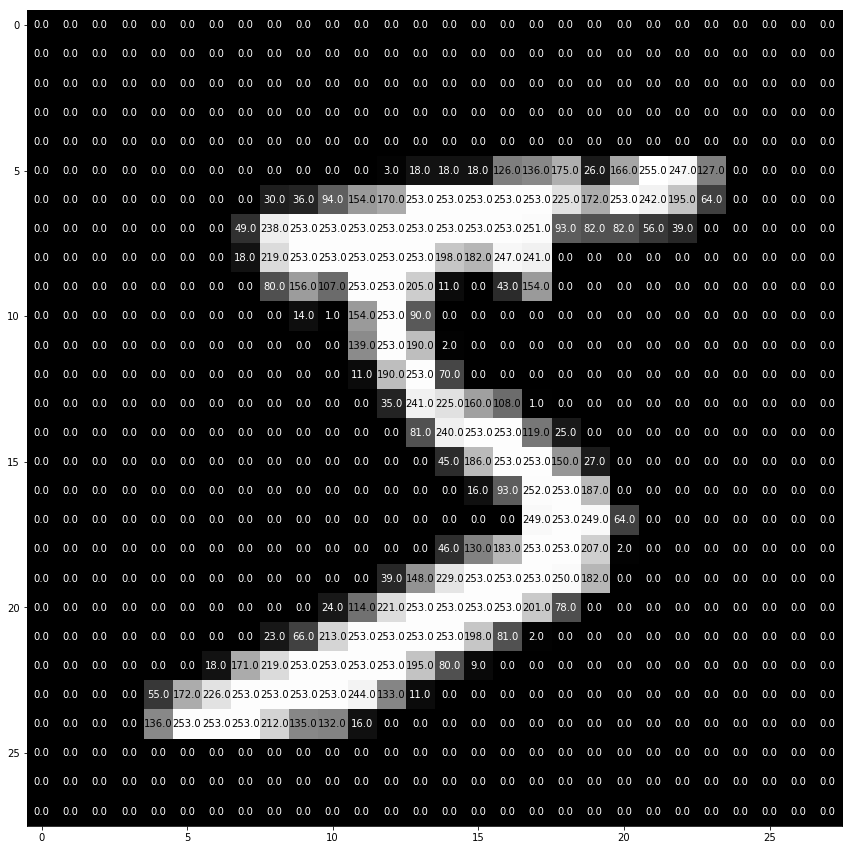

In [4]:
def visualize_input(img, ax):
    ax.imshow(img, cmap = 'gray')
    width, height = img.shape
    thresh = img.max()/2.55
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y], 2) ), xy = (y,x), horizontalalignment = 'center',
                        verticalalignment = 'center', color = 'white' if img[x][y] < thresh else 'black')

fig = plt.figure(figsize = (15,15) )
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

# CNN